In [85]:
import pandas as pd
import collections
from collections import Counter
import time
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [86]:
### SKIP IF ALREADY SAVED DATAFRAMES

In [87]:
### LOAD DATAFRAMES

df_all = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_allprojects.pkl')
df_success = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_successprojects.pkl')
df_fail = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_failprojects.pkl')

In [88]:
### RETURNING CREATORS

df0 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()>=1].index)]
df1 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()==1].index)]
df2 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()>=2].index)]
df2_2 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==2].index)]
df2_3 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==3].index)]
df2_4 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==4].index)]
df2_5 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==5].index)]
df6 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()>5].index)]
print('Number of projects: ' + str(len(df0)))
print('Number of projects with returning creators: ' + str(len(df2)))

print()
print('Number of creators with = 1 project: ' + str(len(df1)))
print('Number of creators with = 2 project: ' + str(len(df2_2)/2))
print('Number of creators with = 3 project: ' + str(len(df2_3)/3))
print('Number of creators with = 4 project: ' + str(len(df2_4)/4))
print('Number of creators with = 5 project: ' + str(len(df2_5)/5))

# first sort by creator id, then sort by date
df2.sort_values(['creator_id', 'created_at'], ascending = [True, True], inplace = True)

creator_freq = df2['creator_id'].value_counts().to_dict()
print()
print('Average number of rounds for creators with >1 project: ' + str(round(sum(creator_freq.values()) / len(creator_freq.values()), 4)))
df2_s = pd.DataFrame() # success first
df2_f = pd.DataFrame() # fail first
df2_ss = pd.DataFrame() # success first, success second
df2_sss = pd.DataFrame() # success first, success second, success third
df2_ssf = pd.DataFrame() # success first, success second, fail third
df2_sf = pd.DataFrame() # success first, fail second
df2_sfs = pd.DataFrame() # success first, fail second, success third
df2_sff = pd.DataFrame() # success first, fail second, fail third
df2_fs = pd.DataFrame() # fail first, success second
df2_fss = pd.DataFrame() # fail first, success second, success third
df2_fsf = pd.DataFrame() # fail first, success second, fail third
df2_ff = pd.DataFrame() # fail first, fail second
df2_ffs = pd.DataFrame() # fail first, fail second, success third
df2_fff = pd.DataFrame() # fail first, fail second, fail third

count = 0
for k,v in creator_freq.items():
    temp = df2.loc[df2['creator_id'] == k]
    if list(temp['state'])[0] == 'successful':
        df2_s = df2_s.append(temp)
        if list(temp['state'])[1] == 'successful':
            df2_ss = df2_ss.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_sss = df2_sss.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_ssf = df2_ssf.append(temp)
        else:
            df2_sf = df2_sf.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_sfs = df2_sfs.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_sff = df2_sff.append(temp)
    else:
        df2_f = df2_f.append(temp)
        if list(temp['state'])[1] == 'successful':
            df2_fs = df2_fs.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_fss = df2_fss.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_fsf = df2_fsf.append(temp)
        else:
            df2_ff = df2_ff.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_ffs = df2_ffs.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_fff = df2_fff.append(temp)

print('Number of returning projects with S: ' + str(len(df2_s)))
print('Number of returning projects with F: ' + str(len(df2_f)))
print('Number of returning projects with S/S: ' + str(len(df2_ss)))
print('Number of returning projects with S/F: ' + str(len(df2_sf)))
print('Number of returning projects with F/S: ' + str(len(df2_fs)))
print('Number of returning projects with F/F: ' + str(len(df2_ff)))
print('Number of returning projects with S/S/S: ' + str(len(df2_sss)))
print('Number of returning projects with S/S/F: ' + str(len(df2_ssf)))
print('Number of returning projects with S/F/S: ' + str(len(df2_sfs)))
print('Number of returning projects with S/F/F: ' + str(len(df2_sff)))
print('Number of returning projects with F/S/S: ' + str(len(df2_fss)))
print('Number of returning projects with F/S/F: ' + str(len(df2_fsf)))
print('Number of returning projects with F/F/S: ' + str(len(df2_ffs)))
print('Number of returning projects with F/F/F: ' + str(len(df2_fff)))
        

Number of projects: 124450
Number of projects with returning creators: 19923

Number of creators with = 1 project: 104527
Number of creators with = 2 project: 6446.0
Number of creators with = 3 project: 1032.0
Number of creators with = 4 project: 338.0
Number of creators with = 5 project: 138.0

Average number of rounds for creators with >1 project: 2.4427


/Users/sarinaliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [89]:
### SKIP TO HERE IF NOT ALREADY SAVED DATAFRAMES
df2_s = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_s.pkl')
df2_f = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_f.pkl')

df2_ss = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_ss.pkl')
df2_sf = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_sf.pkl')
df2_fs = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_fs.pkl')
df2_ff = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_ff.pkl')

df2_sss = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_sss.pkl')
df2_ssf = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_ssf.pkl')
df2_sfs = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_sfs.pkl')
df2_sff = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_sff.pkl')
df2_fss = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_fss.pkl')
df2_fsf = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_fsf.pkl')
df2_ffs = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_ffs.pkl')
df2_fff = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_fff.pkl')


print('Number of returning projects with S: ' + str(len(df2_s)))
print('Number of returning projects with F: ' + str(len(df2_f)))
print('Number of returning projects with S/S: ' + str(len(df2_ss)))
print('Number of returning projects with S/F: ' + str(len(df2_sf)))
print('Number of returning projects with F/S: ' + str(len(df2_fs)))
print('Number of returning projects with F/F: ' + str(len(df2_ff)))
print('Number of returning projects with S/S/S: ' + str(len(df2_sss)))
print('Number of returning projects with S/S/F: ' + str(len(df2_ssf)))
print('Number of returning projects with S/F/S: ' + str(len(df2_sfs)))
print('Number of returning projects with S/F/F: ' + str(len(df2_sff)))
print('Number of returning projects with F/S/S: ' + str(len(df2_fss)))
print('Number of returning projects with F/S/F: ' + str(len(df2_fsf)))
print('Number of returning projects with F/F/S: ' + str(len(df2_ffs)))
print('Number of returning projects with F/F/F: ' + str(len(df2_fff)))

Number of returning projects with S: 10060
Number of returning projects with F: 9863
Number of returning projects with S/S: 8916
Number of returning projects with S/F: 1144
Number of returning projects with F/S: 1860
Number of returning projects with F/F: 8003
Number of returning projects with S/S/S: 3998
Number of returning projects with S/S/F: 234
Number of returning projects with S/F/S: 274
Number of returning projects with S/F/F: 106
Number of returning projects with F/S/S: 347
Number of returning projects with F/S/F: 155
Number of returning projects with F/F/S: 140
Number of returning projects with F/F/F: 1777


In [90]:
### PROBABILITY OF SUCCESS

prob_success1 = len(df2_s)/(len(df2_s)+len(df2_f))
print('First Round')
print('Probability of success for projects with returning creators: ' + 
      str(round(prob_success1,4)))

print()
print('Second Round')
prob_success2 = len(df2_ss)/(len(df2_ss)+len(df2_sf))
print('Probability of success for projects with success first: ' + 
      str(round(prob_success2,4)))
prob_success3 = len(df2_fs)/(len(df2_fs)+len(df2_ff))
print('Probability of success for projects with fail first: ' + 
      str(round(prob_success3,4)))

print()
print('Third Round')
prob_success4 = len(df2_sss)/(len(df2_sss)+len(df2_ssf))
print('Probability of success for projects with success first, success second: ' + 
      str(round(prob_success4,4)))
prob_success5 = len(df2_sfs)/(len(df2_sfs)+len(df2_sff))
print('Probability of success for projects with success first, fail second: ' + 
      str(round(prob_success5,4)))
prob_success6 = len(df2_fss)/(len(df2_fss)+len(df2_fsf))
print('Probability of success for projects with fail first, success second: ' + 
      str(round(prob_success6,4)))
prob_success7 = len(df2_ffs)/(len(df2_ffs)+len(df2_fff))
print('Probability of success for projects with fail first, fail second: ' + 
      str(round(prob_success7,4)))


First Round
Probability of success for projects with returning creators: 0.5049

Second Round
Probability of success for projects with success first: 0.8863
Probability of success for projects with fail first: 0.1886

Third Round
Probability of success for projects with success first, success second: 0.9447
Probability of success for projects with success first, fail second: 0.7211
Probability of success for projects with fail first, success second: 0.6912
Probability of success for projects with fail first, fail second: 0.073


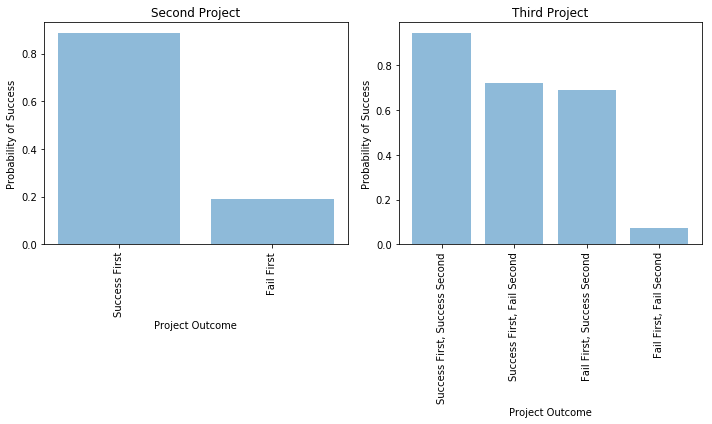

In [91]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
objects = ('Success First', 'Fail First')
y_pos = np.arange(len(objects))
performance = [prob_success2, prob_success3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Probability of Success')
plt.xlabel('Project Outcome')
plt.title('Second Project')

plt.subplot(1, 2, 2)
objects = ('Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second')
y_pos = np.arange(len(objects))
performance = [prob_success4, prob_success5, prob_success6, prob_success7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Probability of Success')
plt.xlabel('Project Outcome')
plt.title('Third Project')

plt.tight_layout()
plt.show()

First Project Mean Goal Size [S, F]: [6276.0469920477135, 8585.562803406672]
First Project Median Goal Size [S, F]: [3333.0, 5000.0]
Second Project Mean Goal Size [SS, SF, FS, FF]: [6223.023823463436, 6689.293994755245, 7048.3905645161285, 8942.821376983631]
Second Project Median Goal Size [SS, SF, FS, FF]: [3500.0, 3000.0, 3750.0, 5000.0]


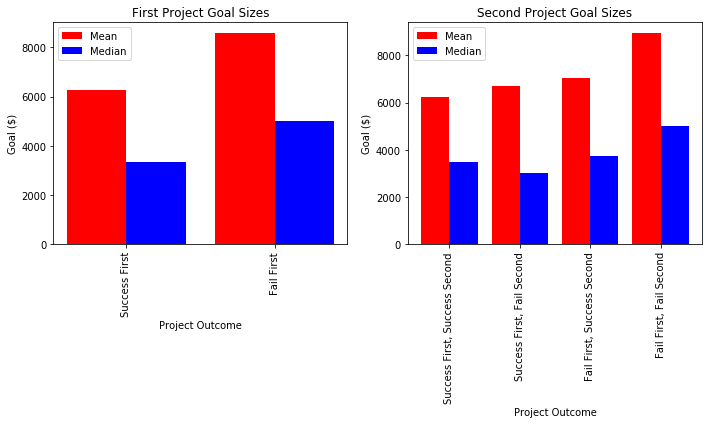

In [92]:
### GOAL

# First Project
goal_s = list(df2_s['goal'])
mean_goal_s = np.mean(goal_s)
median_goal_s = statistics.median(goal_s)
goal_f = list(df2_f['goal'])
mean_goal_f = np.mean(goal_f)
median_goal_f = statistics.median(goal_f)
mean_goal1 = [mean_goal_s, mean_goal_f]
median_goal1 = [median_goal_s, median_goal_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_goal1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Goal Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

print('First Project Mean Goal Size [S, F]: ' + str(mean_goal1))
print('First Project Median Goal Size [S, F]: ' + str(median_goal1))

# Second Project
goal_ss = list(df2_ss['goal'])
mean_goal_ss = np.mean(goal_ss)
median_goal_ss = statistics.median(goal_ss)
goal_sf = list(df2_sf['goal'])
mean_goal_sf = np.mean(goal_sf)
median_goal_sf = statistics.median(goal_sf)
goal_fs = list(df2_fs['goal'])
mean_goal_fs = np.mean(goal_fs)
median_goal_fs = statistics.median(goal_fs)
goal_ff = list(df2_ff['goal'])
mean_goal_ff = np.mean(goal_ff)
median_goal_ff = statistics.median(goal_ff)
mean_goal2 = [mean_goal_ss, mean_goal_sf, mean_goal_fs, mean_goal_ff]
median_goal2 = [median_goal_ss, median_goal_sf, median_goal_fs, median_goal_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_goal2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Goal Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

print('Second Project Mean Goal Size [SS, SF, FS, FF]: ' + str(mean_goal2))
print('Second Project Median Goal Size [SS, SF, FS, FF]: ' + str(median_goal2))

plt.tight_layout()
plt.show()


First Project Mean Pledged Size [S, F]: [14522.312218687874, 1489.429441346446]
First Project Median Pledged Size [S, F]: [4904.5, 115.0]
Second Project Mean Pledged Size [SS, SF, FS, FF]: [15592.276109241815, 6183.327910839162, 5369.254311827956, 587.7083043858554]
Second Project Median Pledged Size [SS, SF, FS, FF]: [5220.165, 2079.0, 2112.0, 55.0]


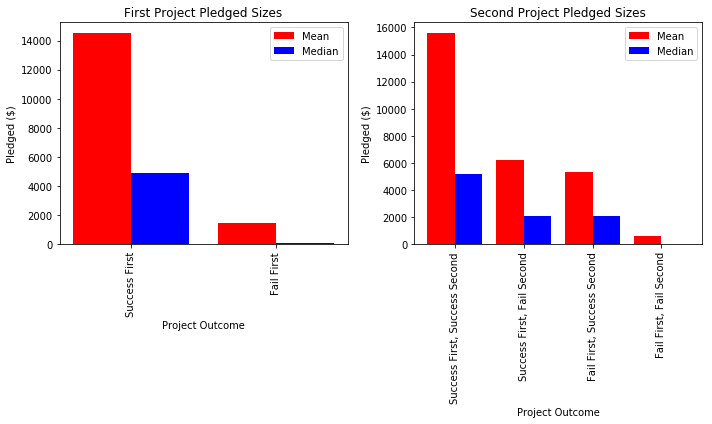

In [93]:
### PLEDGED

# First Project
pledged_s = list(df2_s['usd_pledged'])
mean_pledged_s = np.mean(pledged_s)
median_pledged_s = statistics.median(pledged_s)
pledged_f = list(df2_f['usd_pledged'])
mean_pledged_f = np.mean(pledged_f)
median_pledged_f = statistics.median(pledged_f)
mean_pledged1 = [mean_pledged_s, mean_pledged_f]
median_pledged1 = [median_pledged_s, median_pledged_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pledged1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Pledged Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

print('First Project Mean Pledged Size [S, F]: ' + str(mean_pledged1))
print('First Project Median Pledged Size [S, F]: ' + str(median_pledged1))

# Second Project
pledged_ss = list(df2_ss['usd_pledged'])
mean_pledged_ss = np.mean(pledged_ss)
median_pledged_ss = statistics.median(pledged_ss)
pledged_sf = list(df2_sf['usd_pledged'])
mean_pledged_sf = np.mean(pledged_sf)
median_pledged_sf = statistics.median(pledged_sf)
pledged_fs = list(df2_fs['usd_pledged'])
mean_pledged_fs = np.mean(pledged_fs)
median_pledged_fs = statistics.median(pledged_fs)
pledged_ff = list(df2_ff['usd_pledged'])
mean_pledged_ff = np.mean(pledged_ff)
median_pledged_ff = statistics.median(pledged_ff)
mean_pledged2 = [mean_pledged_ss, mean_pledged_sf, mean_pledged_fs, mean_pledged_ff]
median_pledged2 = [median_pledged_ss, median_pledged_sf, median_pledged_fs, median_pledged_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_pledged2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Pledged Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

print('Second Project Mean Pledged Size [SS, SF, FS, FF]: ' + str(mean_pledged2))
print('Second Project Median Pledged Size [SS, SF, FS, FF]: ' + str(median_pledged2))

plt.tight_layout()
plt.show()


First Project Mean P/G [S, F]: [2.3011438699493922, 0.295349545999483]
First Project Median P/G [S, F]: [1.214, 0.02666666666666667]
Second Project Mean P/G [SS, SF, FS, FF]: [2.4594747562384156, 0.10148563493520942]
Second Project Median P/G [SS, SF, FS, FF]: [1.2485357142857143, 0.011666666666666667]


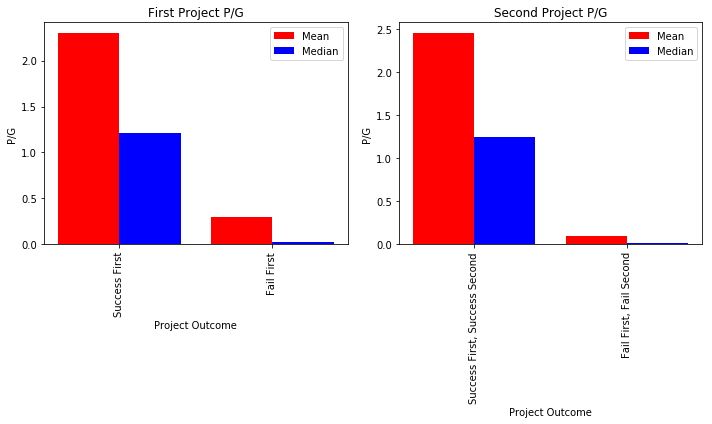

In [94]:
### P/G

# First Project
pg_s = list(df2_s['P/G'])
mean_pg_s = np.mean(pg_s)
median_pg_s = statistics.median(pg_s)
pg_f = list(df2_f['P/G'])
mean_pg_f = np.mean(pg_f)
median_pg_f = statistics.median(pg_f)
mean_pg1 = [mean_pg_s, mean_pg_f]
median_pg1 = [median_pg_s, median_pg_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pg1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project P/G')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

print('First Project Mean P/G [S, F]: ' + str(mean_pg1))
print('First Project Median P/G [S, F]: ' + str(median_pg1))

# Second Project
pg_ss = list(df2_ss['P/G'])
mean_pg_ss = np.mean(pg_ss)
median_pg_ss = statistics.median(pg_ss)
pg_ff = list(df2_ff['P/G'])
mean_pg_ff = np.mean(pg_ff)
median_pg_ff = statistics.median(pg_ff)
mean_pg2 = [mean_pg_ss, mean_pg_ff]
median_pg2 = [median_pg_ss, median_pg_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second','Fail First, Fail Second']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pg2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project P/G')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

print('Second Project Mean P/G [SS, SF, FS, FF]: ' + str(mean_pg2))
print('Second Project Median P/G [SS, SF, FS, FF]: ' + str(median_pg2))

plt.tight_layout()
plt.show()


First Project Mean Backers [S, F]: [227.229324055666, 25.173071073709824]
First Project Median Backers [S, F]: [84.0, 4]
Second Project Mean Backers [SS, SF, FS, FF]: [243.87247644683714, 97.51748251748252, 85.78118279569892, 11.08696738722979]
Second Project Median Backers [SS, SF, FS, FF]: [92.0, 36.0, 31.0, 2]


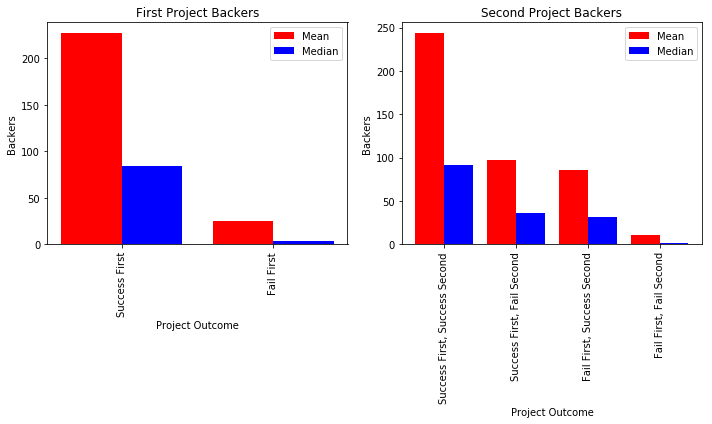

In [95]:
### NUMBER OF BACKERS

# First Project
backers_s = list(df2_s['backers_count'])
mean_backers_s = np.mean(backers_s)
median_backers_s = statistics.median(backers_s)
backers_f = list(df2_f['backers_count'])
mean_backers_f = np.mean(backers_f)
median_backers_f = statistics.median(backers_f)
mean_backers1 = [mean_backers_s, mean_backers_f]
median_backers1 = [median_backers_s, median_backers_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_backers1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Backers')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

print('First Project Mean Backers [S, F]: ' + str(mean_backers1))
print('First Project Median Backers [S, F]: ' + str(median_backers1))

# Second Project
backers_ss = list(df2_ss['backers_count'])
mean_backers_ss = np.mean(backers_ss)
median_backers_ss = statistics.median(backers_ss)
backers_sf = list(df2_sf['backers_count'])
mean_backers_sf = np.mean(backers_sf)
median_backers_sf = statistics.median(backers_sf)
backers_fs = list(df2_fs['backers_count'])
mean_backers_fs = np.mean(backers_fs)
median_backers_fs = statistics.median(backers_fs)
backers_ff = list(df2_ff['backers_count'])
mean_backers_ff = np.mean(backers_ff)
median_backers_ff = statistics.median(backers_ff)
mean_backers2 = [mean_backers_ss, mean_backers_sf, mean_backers_fs, mean_backers_ff]
median_backers2 = [median_backers_ss, median_backers_sf, median_backers_fs, median_backers_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_backers2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Backers')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

print('Second Project Mean Backers [SS, SF, FS, FF]: ' + str(mean_backers2))
print('Second Project Median Backers [SS, SF, FS, FF]: ' + str(median_backers2))

plt.tight_layout()
plt.show()

First Project Mean Duration [S, F]: [1.2413735696996817, 1.2146320278147251]
First Project Median Duration [S, F]: [1.2177202665200366, 1.1474560660991593]
Second Project Mean Duration [SS, SF, FS, FF]: [1.244647149764203, 1.2158602481478722, 1.2229811282563132, 1.2126915896263764]
Second Project Median Duration [SS, SF, FS, FF]: [1.2207621952842596, 1.1879632101351234, 1.1885695424577127, 1.1390183690744278]


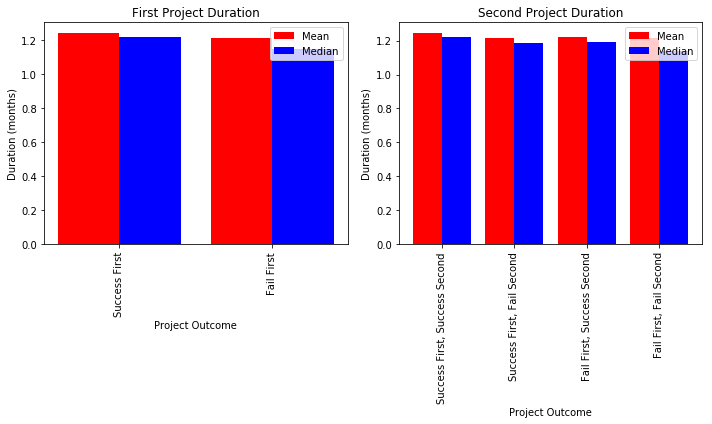

In [96]:
### DURATION

# First Project
duration_s = list(df2_s['duration'])
mean_duration_s = np.mean(duration_s)
median_duration_s = statistics.median(duration_s)
duration_f = list(df2_f['duration'])
mean_duration_f = np.mean(duration_f)
median_duration_f = statistics.median(duration_f)
mean_duration1 = [mean_duration_s, mean_duration_f]
median_duration1 = [median_duration_s, median_duration_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_duration1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Duration')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (months)')

print('First Project Mean Duration [S, F]: ' + str(mean_duration1))
print('First Project Median Duration [S, F]: ' + str(median_duration1))

# Second Project
duration_ss = list(df2_ss['duration'])
mean_duration_ss = np.mean(duration_ss)
median_duration_ss = statistics.median(duration_ss)
duration_sf = list(df2_sf['duration'])
mean_duration_sf = np.mean(duration_sf)
median_duration_sf = statistics.median(duration_sf)
duration_fs = list(df2_fs['duration'])
mean_duration_fs = np.mean(duration_fs)
median_duration_fs = statistics.median(duration_fs)
duration_ff = list(df2_ff['duration'])
mean_duration_ff = np.mean(duration_ff)
median_duration_ff = statistics.median(duration_ff)
mean_duration2 = [mean_duration_ss, mean_duration_sf, mean_duration_fs, mean_duration_ff]
median_duration2 = [median_duration_ss, median_duration_sf, median_duration_fs, median_duration_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_duration2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Duration')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (months)')

print('Second Project Mean Duration [SS, SF, FS, FF]: ' + str(mean_duration2))
print('Second Project Median Duration [SS, SF, FS, FF]: ' + str(median_duration2))

plt.tight_layout()
plt.show()

In [119]:
creators_sss = df2_sss['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_sss.keys():
    temp = df2_sss.loc[df2_sss['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


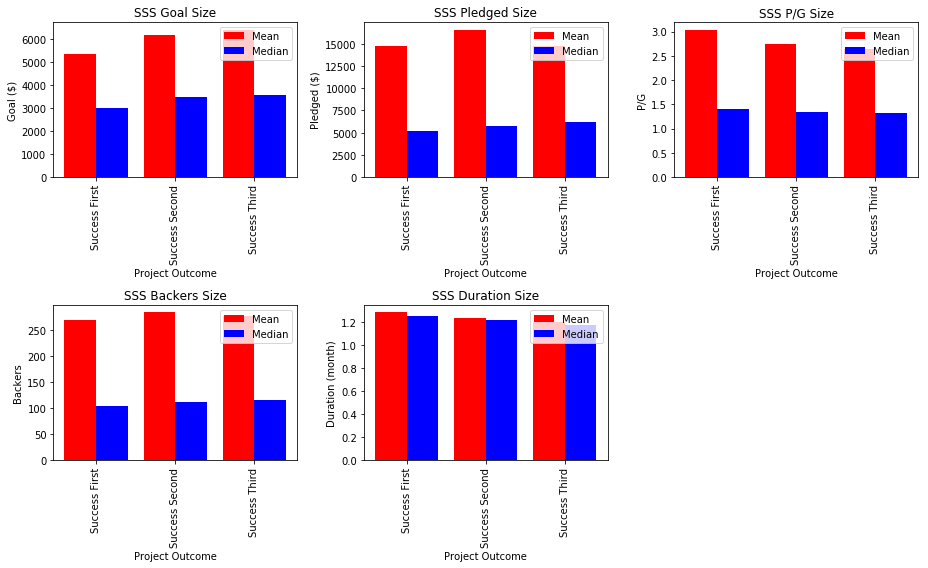

[3000.0, 3500.0, 3581.0]
[5205.0, 5767.14, 6190.0]
[1.405, 1.3416666666666666, 1.3222222222222222]
[104, 111, 115]
[1.2592238946270857, 1.216871135083008, 1.180597289624169]


In [125]:
mean_goal_sss = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_sss = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_sss = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_sss = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_sss = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_sss = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_sss = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_sss = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_sss = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_sss = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Success First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_sss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_sss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSS Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Success First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_sss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_sss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSS Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Success First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_sss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_sss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSS P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Success First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_sss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_sss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSS Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Success First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_sss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_sss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSS Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_sss)
print(median_pledged_sss)
print(median_pg_sss)
print(median_backers_sss)
print(median_duration_sss)

In [129]:
creators_ssf = df2_ssf['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_ssf.keys():
    temp = df2_ssf.loc[df2_ssf['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


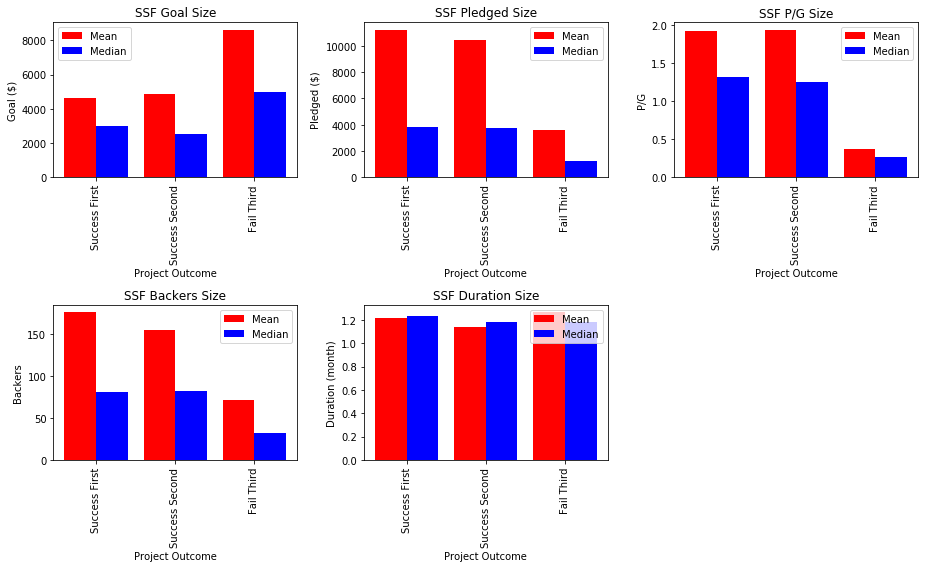

[2996.0, 2500.0, 5000.0]
[3834.0, 3778.37, 1229.0]
[1.3170666666666666, 1.248, 0.26843333333333336]
[81, 82, 32]
[1.238759180544433, 1.1865366465050238, 1.1851764390933572]


In [130]:
mean_goal_ssf = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_ssf = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_ssf = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_ssf = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_ssf = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_ssf = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_ssf = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_ssf = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_ssf = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_ssf = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Success First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_ssf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_ssf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSF Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Success First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_ssf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_ssf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSF Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Success First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_ssf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_ssf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSF P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Success First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_ssf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_ssf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSF Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Success First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_ssf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_ssf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SSF Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_ssf)
print(median_pledged_ssf)
print(median_pg_ssf)
print(median_backers_ssf)
print(median_duration_ssf)

In [131]:
creators_sfs = df2_sfs['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_sfs.keys():
    temp = df2_sfs.loc[df2_sfs['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


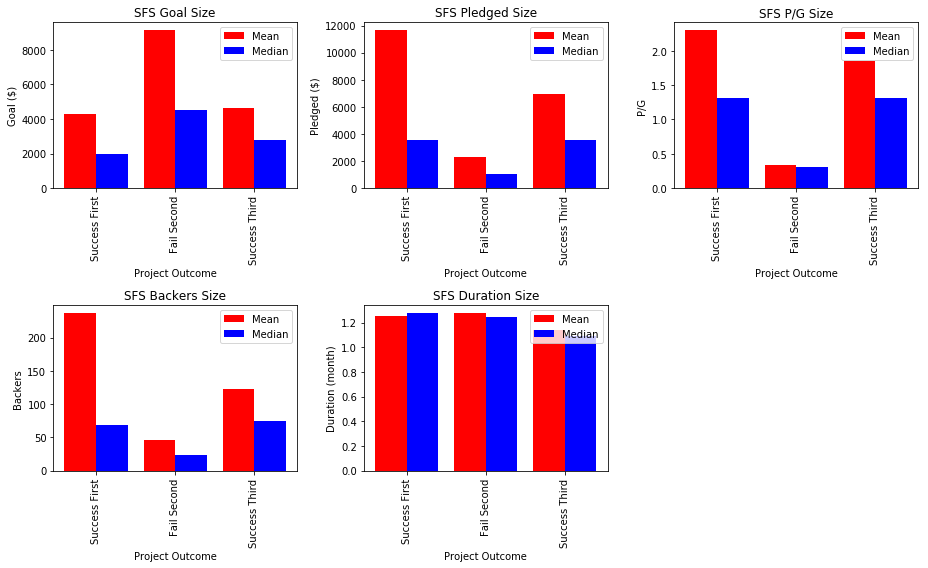

[2000.0, 4500.0, 2800.0]
[3516.0, 1051.0, 3550.0]
[1.316, 0.3032627692307693, 1.3105]
[68, 23, 75]
[1.2755102584051843, 1.2445068839347984, 1.0931736373018535]


In [132]:
mean_goal_sfs = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_sfs = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_sfs = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_sfs = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_sfs = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_sfs = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_sfs = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_sfs = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_sfs = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_sfs = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Success First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_sfs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_sfs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFS Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Success First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_sfs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_sfs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFS Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Success First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_sfs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_sfs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFS P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Success First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_sfs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_sfs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFS Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Success First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_sfs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_sfs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFS Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_sfs)
print(median_pledged_sfs)
print(median_pg_sfs)
print(median_backers_sfs)
print(median_duration_sfs)

In [134]:
creators_sff = df2_sff['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_sff.keys():
    temp = df2_sff.loc[df2_sff['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


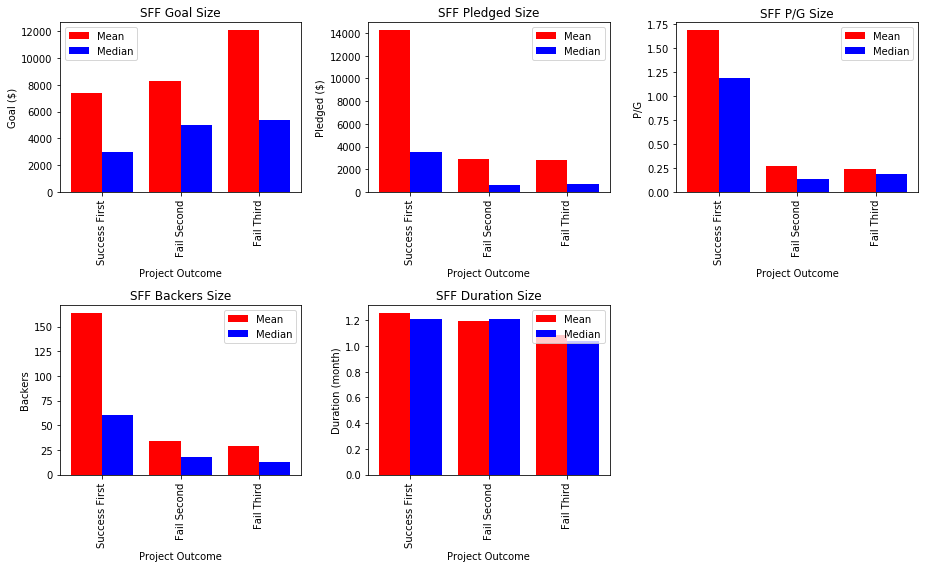

[3000.0, 5000.0, 5357.5]
[3506.005, 578.5, 685.0]
[1.1927815625, 0.13805555555555554, 0.18255398322851152]
[60.0, 17.5, 13.0]
[1.2146781476233826, 1.2148865327678033, 1.0414311876508227]


In [135]:
mean_goal_sff = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_sff = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_sff = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_sff = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_sff = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_sff = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_sff = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_sff = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_sff = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_sff = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Success First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_sff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_sff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFF Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Success First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_sff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_sff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFF Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Success First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_sff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_sff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFF P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Success First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_sff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_sff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFF Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Success First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_sff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_sff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('SFF Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_sff)
print(median_pledged_sff)
print(median_pg_sff)
print(median_backers_sff)
print(median_duration_sff)

In [142]:
creators_fss = df2_fss['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_fss.keys():
    temp = df2_fss.loc[df2_fss['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


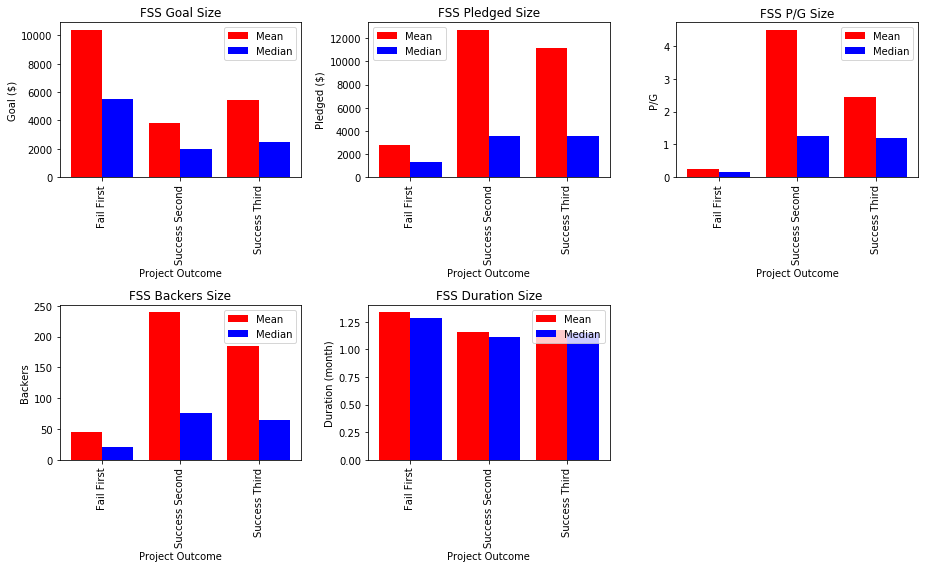

[5500.0, 2000.0, 2500.0]
[1272.0, 3536.0, 3515.0]
[0.166, 1.2564705882352942, 1.2025]
[21, 76, 65]
[1.2812130905418242, 1.114650236182506, 1.1498669453247576]


In [143]:
mean_goal_fss = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_fss = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_fss = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_fss = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_fss = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_fss = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_fss = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_fss = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_fss = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_fss = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Fail First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_fss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_fss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSS Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Fail First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_fss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_fss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSS Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Fail First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_fss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_fss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSS P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Fail First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_fss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_fss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSS Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Fail First', 'Success Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_fss, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_fss, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSS Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_fss)
print(median_pledged_fss)
print(median_pg_fss)
print(median_backers_fss)
print(median_duration_fss)

In [144]:
creators_fsf = df2_fsf['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_fsf.keys():
    temp = df2_fsf.loc[df2_fsf['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


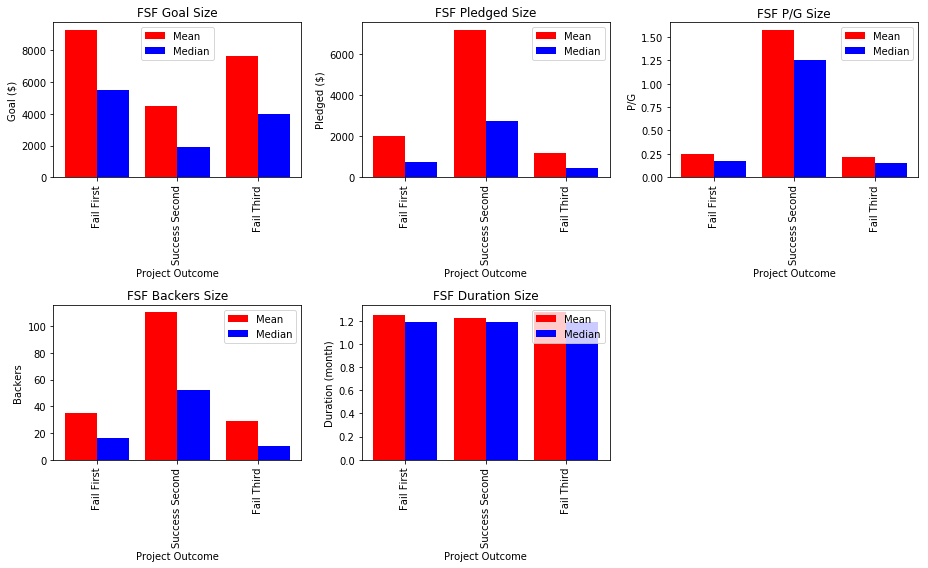

[5500.0, 1922.5, 4000.0]
[740.5, 2747.5, 469.195]
[0.17541666666666667, 1.24885, 0.14866666666666667]
[16.0, 52.0, 10.0]
[1.1861267209836996, 1.185589977130871, 1.18663095219082]


In [145]:
mean_goal_fsf = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_fsf = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_fsf = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_fsf = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_fsf = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_fsf = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_fsf = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_fsf = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_fsf = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_fsf = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Fail First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_fsf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_fsf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSF Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Fail First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_fsf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_fsf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSF Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Fail First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_fsf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_fsf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSF P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Fail First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_fsf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_fsf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSF Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Fail First', 'Success Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_fsf, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_fsf, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FSF Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_fsf)
print(median_pledged_fsf)
print(median_pg_fsf)
print(median_backers_fsf)
print(median_duration_fsf)

In [146]:
creators_ffs = df2_ffs['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_ffs.keys():
    temp = df2_ffs.loc[df2_ffs['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


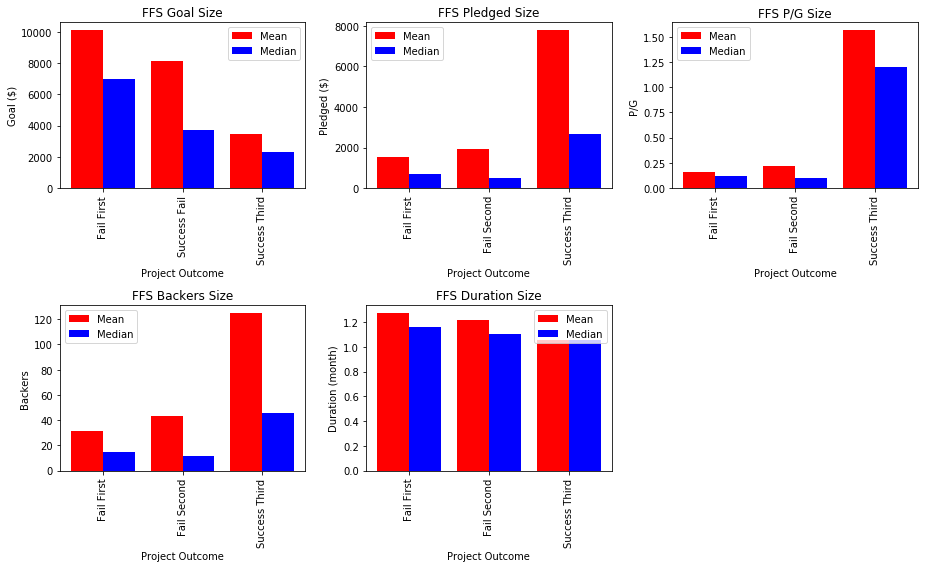

[7000.0, 3750.0, 2300.0]
[710.0, 505.5, 2687.255]
[0.11578571428571428, 0.0984, 1.206357142857143]
[14.5, 11.5, 45.5]
[1.1644892700663867, 1.1042079729373104, 1.0560586459680896]


In [147]:
mean_goal_ffs = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_ffs = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_ffs = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_ffs = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_ffs = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_ffs = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_ffs = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_ffs = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_ffs = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_ffs = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Fail First', 'Success Fail', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Fail First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Fail First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Fail First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Fail First', 'Fail Second', 'Success Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_ffs)
print(median_pledged_ffs)
print(median_pg_ffs)
print(median_backers_ffs)
print(median_duration_ffs)

In [148]:
creators_fff = df2_fff['creator_id'].value_counts().to_dict()

goal1 = []
goal2 = []
goal3 = []
pledged1 = []
pledged2 = []
pledged3 = []
pg1 = []
pg2 = []
pg3 = []
backers1 = []
backers2 = []
backers3 = []
duration1 = []
duration2 = []
duration3 = []

for i in creators_fff.keys():
    temp = df2_fff.loc[df2_fff['creator_id'] == i]
    goal1.append(list(temp['goal'])[0])
    goal2.append(list(temp['goal'])[1])
    goal3.append(list(temp['goal'])[2])
    pledged1.append(list(temp['usd_pledged'])[0])
    pledged2.append(list(temp['usd_pledged'])[1])
    pledged3.append(list(temp['usd_pledged'])[2])
    pg1.append(list(temp['P/G'])[0])
    pg2.append(list(temp['P/G'])[1])
    pg3.append(list(temp['P/G'])[2])
    backers1.append(list(temp['backers_count'])[0])
    backers2.append(list(temp['backers_count'])[1])
    backers3.append(list(temp['backers_count'])[2])
    duration1.append(list(temp['duration'])[0])
    duration2.append(list(temp['duration'])[1])
    duration3.append(list(temp['duration'])[2])


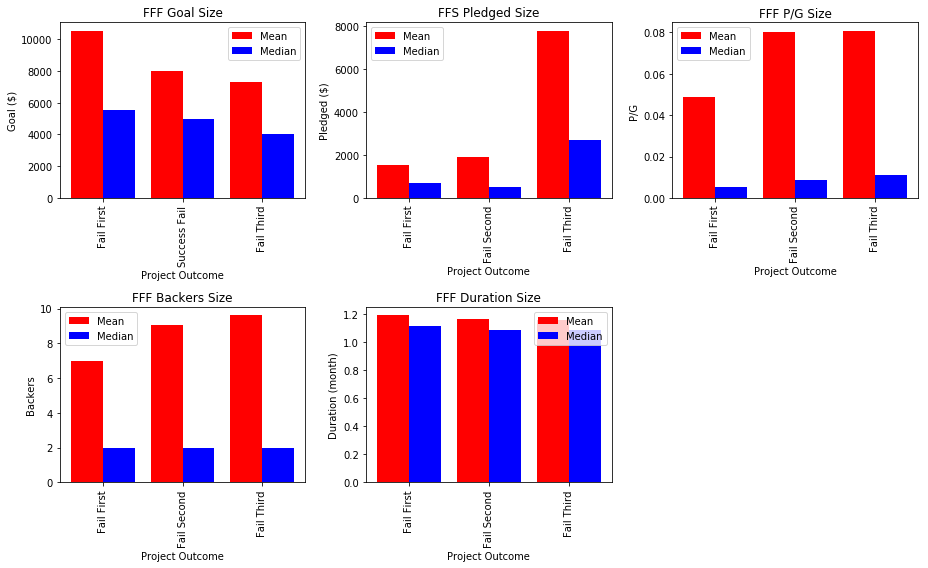

[5527.5, 4950.0, 4000.0]
[40.0, 31.5, 49.5]
[0.0054423076923076925, 0.008466666666666667, 0.011098484848484849]
[2.0, 2.0, 2.0]
[1.1153381353180118, 1.0864176616296783, 1.0853624266374013]


In [149]:
mean_goal_fff = [np.mean(goal1), np.mean(goal2), np.mean(goal3)]
median_goal_fff = [statistics.median(goal1), statistics.median(goal2), statistics.median(goal3)]
mean_pledged_fff = [np.mean(pledged1), np.mean(pledged2), np.mean(pledged3)]
median_pledged_fff = [statistics.median(pledged1), statistics.median(pledged2), statistics.median(pledged3)]
mean_pg_fff = [np.mean(pg1), np.mean(pg2), np.mean(pg3)]
median_pg_fff = [statistics.median(pg1), statistics.median(pg2), statistics.median(pg3)]
mean_backers_fff = [np.mean(backers1), np.mean(backers2), np.mean(backers3)]
median_backers_fff = [statistics.median(backers1), statistics.median(backers2), statistics.median(backers3)]
mean_duration_fff = [np.mean(duration1), np.mean(duration2), np.mean(duration3)]
median_duration_fff = [statistics.median(duration1), statistics.median(duration2), statistics.median(duration3)]

fig = plt.figure(figsize = (13,8))
plt.subplot(2,3,1)
labels2 = ['Fail First', 'Success Fail', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_goal_fff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal_fff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFF Goal Size')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

plt.subplot(2,3,2)
labels2 = ['Fail First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pledged_ffs, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged_ffs, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFS Pledged Size')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

plt.subplot(2,3,3)
labels2 = ['Fail First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_pg_fff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg_fff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFF P/G Size')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

plt.subplot(2,3,4)
labels2 = ['Fail First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_backers_fff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers_fff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFF Backers Size')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

plt.subplot(2,3,5)
labels2 = ['Fail First', 'Fail Second', 'Fail Third']
xval = np.arange(3)
plt.bar(xval - 0.2, mean_duration_fff, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration_fff, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('FFF Duration Size')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (month)')

plt.tight_layout()
plt.show()

print(median_goal_fff)
print(median_pledged_fff)
print(median_pg_fff)
print(median_backers_fff)
print(median_duration_fff)

In [83]:
### SAVE DATAFRAMES

df2_s.to_pickle('../Desktop/saved_dataframes/Store_subset_s.pkl')
df2_f.to_pickle('../Desktop/saved_dataframes/Store_subset_f.pkl')

df2_ss.to_pickle('../Desktop/saved_dataframes/Store_subset_ss.pkl')
df2_sf.to_pickle('../Desktop/saved_dataframes/Store_subset_sf.pkl')
df2_fs.to_pickle('../Desktop/saved_dataframes/Store_subset_fs.pkl')
df2_ff.to_pickle('../Desktop/saved_dataframes/Store_subset_ff.pkl')

df2_sss.to_pickle('../Desktop/saved_dataframes/Store_subset_sss.pkl')
df2_ssf.to_pickle('../Desktop/saved_dataframes/Store_subset_ssf.pkl')
df2_sfs.to_pickle('../Desktop/saved_dataframes/Store_subset_sfs.pkl')
df2_sff.to_pickle('../Desktop/saved_dataframes/Store_subset_sff.pkl')
df2_fss.to_pickle('../Desktop/saved_dataframes/Store_subset_fss.pkl')
df2_fsf.to_pickle('../Desktop/saved_dataframes/Store_subset_fsf.pkl')
df2_ffs.to_pickle('../Desktop/saved_dataframes/Store_subset_ffs.pkl')
df2_fff.to_pickle('../Desktop/saved_dataframes/Store_subset_fff.pkl')